# Problem 1

Use Factory Method pattern to create 3 different classes Circle, Square and Triangle of type
Shape having a method Draw with some implementation of your choice. Have a ShapeFactory
class and a Client class and allow the Client to ask the factory to create some concrete shape
and to call its method Draw. You can decide what should be the client input and how the factory
class should determine which shape to create.

Type "circle", "square" or "triangle" to draw: triangle


<Figure size 360x360 with 0 Axes>

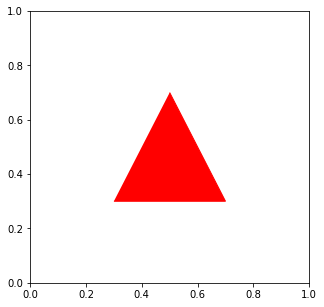

In [1]:
import matplotlib.pyplot as plt  
import numpy as np
plt.figure(figsize=(5,5))

from abc import ABC, abstractmethod


class Shape(ABC):

    @abstractmethod
    def draw(self):
        pass
    
class Circle(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.add_patch(plt.Circle((0.5, 0.5), 0.2, color='red'))

class Square(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.add_patch(plt.Rectangle((0.3, 0.3), 0.4, 0.4, color = 'red'))
        
class Triangle(Shape):
    
    def draw(self):
        fig, ax = plt.subplots(figsize=(5,5))
        pts = np.array([[0.3,0.3], [0.7,0.3], [0.5,0.7]])
        ax.add_patch(plt.Polygon(pts, closed=False, color = 'red'))
        
        
class ShapeFactory:
    
    SHAPES = {'circle': Circle, 'square': Square, 'triangle': Triangle}

    @staticmethod
    def create(shape):
        return ShapeFactory.SHAPES[shape.lower()]()


class Client:

    @staticmethod
    def draw(shape):
        factory = ShapeFactory.create(shape)
        factory.draw()
    
Client.draw(input('Type "circle", "square" or "triangle" to draw: '))

# Problem 2.

Use Factory Method pattern to create 2 different classes PersonalAccount and
BusinessAccount of type BankAccount having a method CreateAccount with some
implementation of your choice. Have a BankAccountFactory class and a Client class and allow
the Client to ask the factory to create an account. The type of the account should be determined
based on the client’s input. You can decide what should be the client input and how the factory
class should determine what type of an account to create.

In [2]:
class BankAccount(ABC):

    @abstractmethod
    def create_account(self):
        pass
    
class PersonalAccount(BankAccount):
    
    def create_account(self):
        print("Personal Account is succssfully created.")

class BusinessAccount(BankAccount):
    
    def create_account(self):
        print("Business Account is succssfully created.")
        
        
        
class BankAccountFactory:
    
    ACCOUNT_TYPES = {'personal': PersonalAccount, 'business': BusinessAccount}

    @staticmethod
    def create(type):
        return BankAccountFactory.ACCOUNT_TYPES[type]()


class Client:

    @staticmethod
    def create_bank_account(type):
        factory = BankAccountFactory.create(type)

        factory.create_account()
    
Client.create_bank_account(input('Type account type : '))

Type account type : business
Business Account is succssfully created.


# Problem 3.

Use the diagram below and function logic of your choice to apply the Abstract Factory pattern.

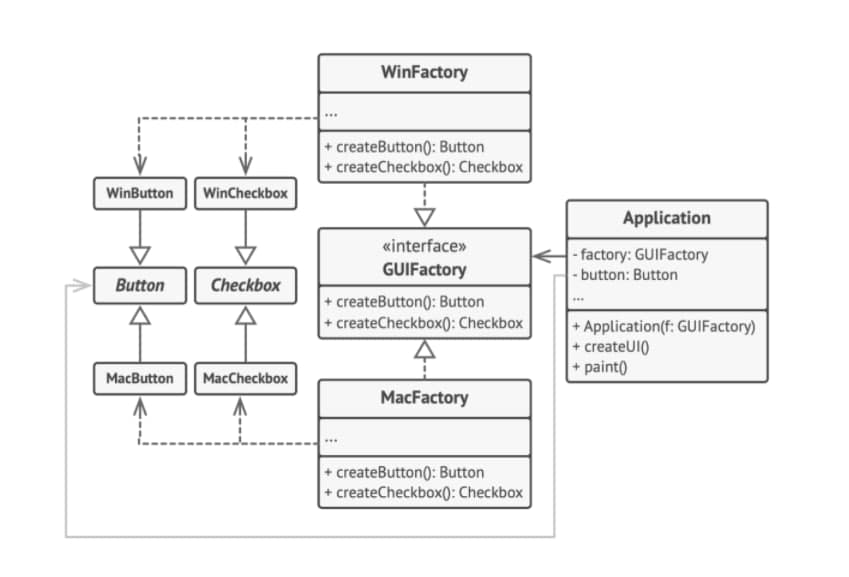

In [4]:
class Application:

    def __init__(self, os):
        FACTORIES = {'windows': WinFactory, 'macos': MacFactory}
        self.factory = FACTORIES[os.lower()]()
        self.button = None
        self.checkbox = None

    def createUI(self):
        self.button = self.factory.create_button()
        self.checkbox = self.factory.create_checkbox()

    def paint(self, color):
        if self.button!= None:
            self.factory.paint_button(color)
            
        if self.checkbox!= None:
            self.factory.paint_checkbox(color)

            
class GUIFactory(ABC):

    @abstractmethod
    def create_button(self):
        pass

    @abstractmethod
    def create_checkbox(self):
        pass
    
    def paint_button(self, color):
        print(f'The button is painted {color}.')

    def paint_checkbox(self, color):
        print(f'The checkbox is painted {color}.')

    
class WinFactory(GUIFactory):

    def create_button(self):
        print('Windows button is created.')
        
        return WinButton()

    def create_checkbox(self):
        print('Windows checkbox is created.')

        return WinCheckbox()
    

class MacFactory(GUIFactory):

    def create_button(self):
        print('Macos button is created.')
        
        return MacButton()

    def create_checkbox(self):
        print('Macos checkbox is created.')

        return MacCheckbox()

class Button(ABC):

    @abstractmethod
    def press(self):
        pass
    
class WinButton(Button):

    def press(self):
        return 'Win button is pressed.'


class MacButton(Button):

    def press(self):
        return 'Mac button is pressed.'

    
class Checkbox(ABC):

    @abstractmethod
    def check(self):
        pass

class WinCheckbox(Checkbox):

    def check(self):
        return 'Win checkbox checked.'


class MacCheckbox(Checkbox):

    def check(self):
        return 'Mac checkbox checked.'


a = Application(os = input('Enter your os ("Windows" or "Macos"): '))
a.createUI()
a.paint(color = 'red')

Enter your os ("Windows" or "Macos"): macos
Macos button is created.
Macos checkbox is created.
The button is painted red.
The checkbox is painted red.
